https://huggingface.co/learn/deep-rl-course/en/unit3/deep-q-algorithm
https://www.kaggle.com/code/getanmolgupta01/unsw-nb15-cybersecurity-threat-detection-ann

In [7]:
import os

In [2]:
import pandas as pd

Utilize data from nsl-kdd dataset for IDS configuration

In [2]:
# pip install gym torch numpy matplotlib

In [3]:
!pip install gymnasium

In [4]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

Looking in indexes: https://download.pytorch.org/whl/cu126


In [5]:
honeyiq_source = "/home/caesar/HoneyIQ/datasets/nsl-kdd/filtered/"

In [8]:
honeyiq_datasource_files_unsw_nb15 = os.listdir(honeyiq_source)
honeyiq_datasource_files_unsw_nb15

['y_test.csv', 'X_test.csv', 'y_train.csv', 'X_train.csv']

In [10]:
X_train = pd.read_csv(honeyiq_source + "X_train.csv")
X_train.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0,-3.011311,-1.523599,0.007443,0.101049,0.048664,-0.364188,-0.054827,0.002979,-0.148092,...,-0.309866,0.006736,0.000388,-0.007593,-0.054149,0.002793,-0.000019,-0.040566,-0.467384,0.057291
1,1,3.078160,-0.733702,-0.080828,0.251749,0.192947,-0.600835,0.198494,0.176344,0.114497,...,-0.192436,0.003992,0.016526,-0.021764,-0.072609,-0.012033,-0.307893,-0.022824,-1.159264,0.196111
2,2,1.529645,-0.422542,-0.003497,-0.427433,0.058331,-0.041266,0.848982,0.475400,0.199631,...,0.084259,0.039689,0.010169,-0.011926,0.035455,-0.028501,-0.332580,-0.017986,-0.148529,0.149338
3,3,0.155213,0.028466,-0.079070,0.345922,-0.220006,2.574101,2.057077,1.416831,1.384435,...,10.771721,-0.199111,-0.265439,0.165749,2.068020,1.043081,2.448783,0.295153,0.435480,-0.275026
4,4,1.518415,-0.585787,-0.219605,-0.649726,-1.824832,1.272826,-0.442415,-0.351427,0.104900,...,-0.237989,-0.006547,0.004566,0.010938,0.077742,-0.034167,-0.021691,-0.004085,0.136192,-0.037709


In [11]:
X_test = pd.read_csv(honeyiq_source + "X_test.csv")
X_test.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0,1.426015,-0.560786,-0.243191,-0.488822,-2.126858,2.176020,-0.500891,-0.440065,0.099200,...,-0.211789,0.009999,-0.005208,0.016870,0.069812,-0.033495,0.019385,-0.032532,0.290571,-0.045925
1,1,-3.135157,7.174110,-0.061511,-0.765879,-0.298349,0.479575,1.987155,2.092450,-3.041444,...,-1.129341,-0.252808,-0.065655,-0.051279,0.031171,0.232653,1.095594,-0.032275,0.087537,-0.173612
2,2,2.538016,-0.886478,-0.117045,-0.727968,-0.546660,-0.767375,0.113500,0.165607,0.027571,...,-0.044411,-0.061614,0.014327,-0.002151,0.078466,-0.039240,0.043139,0.079160,1.045404,-0.268933
3,3,1.429462,-0.537037,0.150567,-6.091248,6.001788,3.057874,-1.116185,-0.175031,-0.059832,...,0.068216,-0.259547,0.026199,0.007030,0.018852,0.106250,-0.275579,0.006832,0.312131,0.184929
4,4,1.713662,5.311493,-0.116474,3.503055,2.121566,-0.687522,-2.465518,-1.418023,0.157033,...,0.140209,0.179395,0.012700,0.024951,-0.308853,-0.022794,0.006522,0.062569,-2.794022,0.740673


In [12]:
y_train = pd.read_csv(honeyiq_source + "y_train.csv")
y_train.head()

,Unnamed: 0,0
0,0,1
1,1,1
2,2,1
3,3,0
4,4,1


In [13]:
y_test = pd.read_csv(honeyiq_source + "y_test.csv")
y_test.head()

,Unnamed: 0,0
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1


In [14]:
X_train.drop(columns=['Unnamed: 0'], inplace=True)
X_test.drop(columns=['Unnamed: 0'], inplace=True)
y_train.drop(columns=['Unnamed: 0'], inplace=True)
y_test.drop(columns=['Unnamed: 0'], inplace=True)


In [15]:
# Create the custom environment for the model
import gymnasium as gym
from gymnasium import spaces

In [16]:
import seaborn as sns
import matplotlib

In [17]:
import numpy as np

<p> <b> Define threat levels based on attack levels </b> </p>

In [18]:
import random
import torch
import torch.nn as nn
import torch.optim as optim

In [19]:
from collections import deque

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

class NetworkThreatEnv(gym.Env):
    def __init__(self, X, y):
        super(NetworkThreatEnv, self).__init__()
        self.X = X  # Features (Pandas DataFrame)
        self.y = y  # Labels (Pandas Series or NumPy array)
        self.current_step = 0
        
        # Define action and observation space
        self.action_space = spaces.Discrete(4)  # 4 threat levels
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(X.shape[1],), dtype=np.float32)
    
    def reset(self):
        self.current_step = 0
        state = self.X.iloc[self.current_step].values  # Access the first row and convert to NumPy array
        return state.astype(np.float32)  # Ensure the state is of type float32
    
    def step(self, action):
        # Check if the episode has ended
        if self.current_step >= len(self.X):
            raise IndexError("Episode has already ended. Call reset() to start a new episode.")

        # print(action)
        # print(self.y.iloc[self.current_step])
        # print(self.current_step)
        # Calculate reward
        if isinstance(self.y, pd.Series):
            reward = 1 if action == self.y.iloc[self.current_step] else -1
        elif isinstance(self.y, np.ndarray):
            reward = 1 if action == self.y[self.current_step] else -1
        else:
            raise ValueError("self.y must be a Pandas Series or NumPy array.")
        
        # Move to the next step
        self.current_step += 1
        
        # Check if the episode has ended
        done = self.current_step >= len(self.X)
        
        # Return the next state
        next_state = np.zeros_like(self.X.iloc[0].values).astype(np.float32) if done else self.X.iloc[self.current_step].values.astype(np.float32)
        return next_state, reward, done, {}

In [21]:
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_size)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)  # Replay memory
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = DQN(state_size, action_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.criterion = nn.MSELoss()
    
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)  # Explore
        state = torch.FloatTensor(state)
        with torch.no_grad():
            q_values = self.model(state)
        return torch.argmax(q_values).item()  # Exploit
    
    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        
        # Convert states and next_states to NumPy arrays of type float32
        states = np.array([t[0] for t in minibatch], dtype=np.float32)
        actions = np.array([t[1] for t in minibatch])
        rewards = np.array([t[2] for t in minibatch], dtype=np.float32)
        next_states = np.array([t[3] for t in minibatch], dtype=np.float32)
        dones = np.array([t[4] for t in minibatch], dtype=np.float32)

        # Convert to PyTorch tensors
        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions)
        rewards = torch.FloatTensor(rewards)
        next_states = torch.FloatTensor(next_states)
        dones = torch.FloatTensor(dones)

        # Compute Q-values for current states
        current_q_values = self.model(states).gather(1, actions.unsqueeze(1))

        # Compute Q-values for next states
        next_q_values = self.model(next_states).max(1)[0].detach()
        target_q_values = rewards + (1 - dones) * self.gamma * next_q_values

        # Compute loss and update the model
        loss = self.criterion(current_q_values.squeeze(), target_q_values)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # Decay epsilon
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [22]:
!pip3 install stable_baselines3

In [23]:
y_train.head()

,0
0,1
1,1
2,1
3,0
4,1


In [24]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-3.011311,-1.523599,0.007443,0.101049,0.048664,-0.364188,-0.054827,0.002979,-0.148092,-0.007314,-0.309866,0.006736,0.000388,-0.007593,-0.054149,0.002793,-0.000019,-0.040566,-0.467384,0.057291
1,3.078160,-0.733702,-0.080828,0.251749,0.192947,-0.600835,0.198494,0.176344,0.114497,0.001381,-0.192436,0.003992,0.016526,-0.021764,-0.072609,-0.012033,-0.307893,-0.022824,-1.159264,0.196111
2,1.529645,-0.422542,-0.003497,-0.427433,0.058331,-0.041266,0.848982,0.475400,0.199631,0.054838,0.084259,0.039689,0.010169,-0.011926,0.035455,-0.028501,-0.332580,-0.017986,-0.148529,0.149338
3,0.155213,0.028466,-0.079070,0.345922,-0.220006,2.574101,2.057077,1.416831,1.384435,1.528089,10.771721,-0.199111,-0.265439,0.165749,2.068020,1.043081,2.448783,0.295153,0.435480,-0.275026
4,1.518415,-0.585787,-0.219605,-0.649726,-1.824832,1.272826,-0.442415,-0.351427,0.104900,-0.017650,-0.237989,-0.006547,0.004566,0.010938,0.077742,-0.034167,-0.021691,-0.004085,0.136192,-0.037709


In [25]:
# from stable_baselines3 import DQN
# from stable_baselines3.common.env_util import make_vec_env

# # Create vectorized environment
# env = make_vec_env(NetworkThreatEnv, n_envs=1)

# # Define and train DQN agent
# model = DQN("MlpPolicy", env, verbose=1)
# model.learn(total_timesteps=10000)

# # Save the model
# model.save("unsw_nb15_dqn")

# env = NetworkThreatEnv(x_train_scaled, y_train)
# state = env.reset()  # Should return the first row of X_train as a NumPy array
# print(state)


In [26]:
y_train.drop(columns=['Unnamed: 0'], inplace=True)

In [27]:
y_test.drop(columns=['Unnamed: 0'], inplace=True)

## Training DQN Agent

In [27]:
# Initialize environment and agent
env = NetworkThreatEnv(X_train, y_train.iloc[:,0] )
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = DQNAgent(state_size, action_size)

# Training parameters
batch_size = 32
num_episodes = 1000

# Training loop
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

    if len(agent.memory) > batch_size:
        agent.replay(batch_size)

    if (episode + 1) % 100 == 0:
        print(f"Episode: {episode + 1}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.2f}")

Episode: 100, Total Reward: -1856, Epsilon: 0.61
Episode: 200, Total Reward: 34740, Epsilon: 0.37
Episode: 300, Total Reward: 57632, Epsilon: 0.22
Episode: 400, Total Reward: 70860, Epsilon: 0.13
Episode: 500, Total Reward: 79044, Epsilon: 0.08
Episode: 600, Total Reward: 83974, Epsilon: 0.05
Episode: 700, Total Reward: 86780, Epsilon: 0.03
Episode: 800, Total Reward: 88766, Epsilon: 0.02
Episode: 900, Total Reward: 89514, Epsilon: 0.01
Episode: 1000, Total Reward: 90276, Epsilon: 0.01


## Evaluate DQN Agent

In [29]:
# Create a test environment
test_env = NetworkThreatEnv(X_test, y_test.iloc[:,0])

# Evaluate the agent
correct_predictions = 0
total_predictions = len(X_test)

state = test_env.reset()
state = np.reshape(state, [1, state_size])
done = False

while not done:
    action = agent.act(state)
    next_state, reward, done, _ = test_env.step(action)
    next_state = np.reshape(next_state, [1, state_size])
    state = next_state

    if reward == 1:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 87.95%


In [30]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate_agent(env, agent):
    """
    Evaluate the DQN agent and compute metrics.
    
    Returns:
        dict: Dictionary containing accuracy, precision, recall, and F1-score.
    """
    all_preds = []
    all_true = []
    
    state = env.reset()
    done = False
    
    while not done:
        action = agent.act(state)  # Model's prediction
        next_state, reward, done, _ = env.step(action)
        
        # Store prediction and true label
        all_preds.append(action)
        all_true.append(env.y[env.current_step - 1])  # Previous step's true label
        
        state = next_state
    
    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(all_true, all_preds),
        'precision': precision_score(all_true, all_preds, average='weighted'),
        'recall': recall_score(all_true, all_preds, average='weighted'),
        'f1': f1_score(all_true, all_preds, average='weighted')
    }
    
    cm = confusion_matrix(all_true, all_preds)
    
    return metrics, cm


In [31]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, class_names=None):
    """
    Plot a confusion matrix using seaborn.
    
    Args:
        cm (np.array): Confusion matrix from sklearn.
        class_names (list): Names of classes (e.g., threat levels).
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, 
                yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [32]:
# Evaluate
metrics = evaluate_agent(test_env, agent)

# Print results
print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"F1-Score: {metrics['f1']:.4f}")

/home/caesar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TypeError: tuple indices must be integers or slices, not str

Evaluation Metrics:
Accuracy: 0.8795
Precision: 0.8924
Recall: 0.8795
F1: 0.8810


/home/caesar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


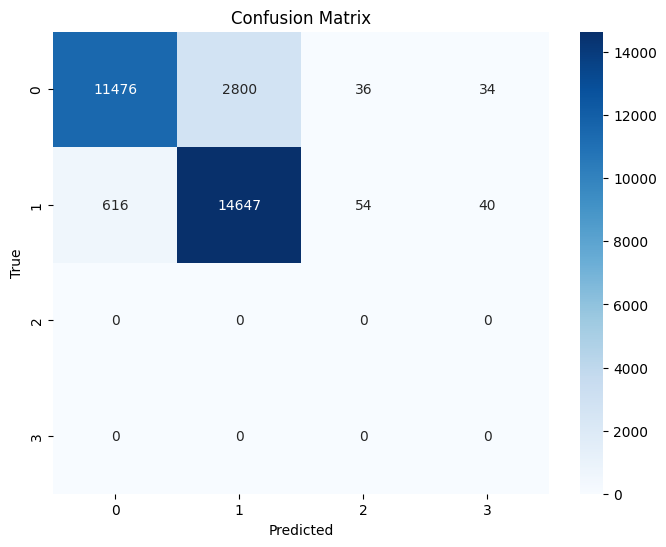

In [34]:
# Initialize test environment
test_env = NetworkThreatEnv(X_test, y_test.values)  # Ensure y_test is a NumPy array

# Evaluate and get metrics + confusion matrix
metrics, cm = evaluate_agent(test_env, agent)

# Print metrics
print("Evaluation Metrics:")
for name, value in metrics.items():
    print(f"{name.capitalize()}: {value:.4f}")

# Plot confusion matrix
class_names = ['0', '1', '2', '3']  # Replace with your actual class names
plot_confusion_matrix(cm, class_names)